# **1) Create Train/Test sets**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical

folder = '/content/drive/MyDrive/AI_final_project/AI_images/'
photos, labels = list(), list()

for file in listdir(folder):
  output=0
  if file.startswith('apple'): 
    output=1
  if file.startswith('banana'): 
    output=2
  if file.startswith('grapes'): 
    output=3  
  if file.startswith('orange'): 
    output=4
  if file.startswith('pear'): 
    output=5
  if file.startswith('tomato'): 
    output=6
  photo=load_img(folder+file,target_size=(60,60))
  photo=img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels) 
print('X size:', photos.shape,'\ny size:' , labels.shape)
save('imgs.npy',photos)
save('labels.npy',labels)

X size: (1440, 60, 60, 3) 
y size: (1440, 7)


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.load('imgs.npy')
y = np.load('labels.npy')
x = x.reshape(1440, 60, 60, 3)
x = x.astype('float32')/255

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    train_size=0.8, 
                                                    random_state=1)

print('x train:', x_train.shape, '\ny train:', y_train.shape)
print('x test:', x_test.shape, '\ny test:', y_test.shape)

x train: (1152, 60, 60, 3) 
y train: (1152, 7)
x test: (288, 60, 60, 3) 
y test: (288, 7)


# **2) Building CNN model**

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(60,60,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1)

model.summary()

Epoch 1/100
18/18 [==============================] - 10s 17ms/step - loss: 1.7864 - accuracy: 0.2726
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 0.9324 - accuracy: 0.6736
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 0.5721 - accuracy: 0.7812
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 0.2314 - accuracy: 0.9201
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 0.1316 - accuracy: 0.9549
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 0.1117 - accuracy: 0.9618
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0893 - accuracy: 0.9696
Epoch 8/100
18/18 [==============================] - 0s 14ms/step - loss: 0.1205 - accuracy: 0.9540
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0954 - accuracy: 0.9679
Epoch 10/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0773 - accuracy: 0.968

## **3) Calculating accuracy of trained model**

In [10]:
loss, acc = model.evaluate(x_test, y_test)
print('accuracy:', acc, '\nloss:', loss)

9/9 [==============================] - 0s 5ms/step - loss: 0.0838 - accuracy: 0.9861
accuracy: 0.9861111044883728 
loss: 0.08378544449806213


In [12]:
model.save('model_'+str(int(acc*100))+'percent.h5')
print('Saved model!\n' + 'File: model_'+str(int(acc*100))+'percent.h5')

Saved model!
File: model_98percent.h5


## **4) Example prediction**


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Image loaded:  apple_on_tree.jpg
1/1 [==============================] - 0s 19ms/step
[1.2616734e-08 9.9786240e-01 4.6602174e-05 1.3602879e-03 1.0430360e-05
 7.1887072e-04 1.4609356e-06]
==> Best predicted label: Apple

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Image loaded:  chinese_golden_pear.jpg
1/1 [==============================] - 0s 19ms/step
[2.3234624e-12 8.7020025e-10 1.2313068e-07 9.4778774e-10 5.4708647e-07
 9.9999928e-01 3.7043097e-08]
==> Best predicted label: Pear

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Image loaded:  orange.jpg
1/1 [==============================] - 0s 20ms/step
[2.3119711e-12 5.2767169e-05 5.7018929e-06 2.4346580e-09 9.9820340e-01
 1.0668704e-03 6.7120971e-04]
==> Best predicted label: Orange

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Image loaded:  grapes_on_tree.jpg
1/1 [==============================] - 0s 21ms/step
[1.3607816e-16 6.6780709e-10 9.8177705e-13 1.0000000e+00 6.0462482e-16
 1.510

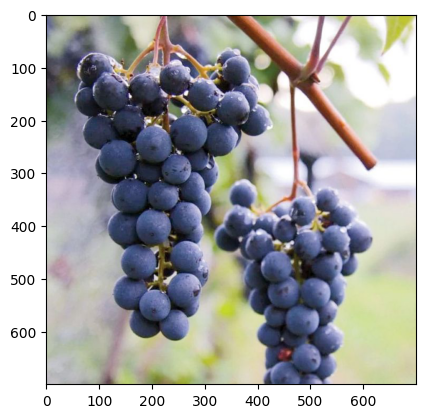

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
my_dict = {1:'Apple', 2:'Banana', 3:'Grapes',
           4:'Orange', 5:'Pear', 6:'Tomato'}

uploaded_imgs = ['apple_on_tree.jpg',
                 'chinese_golden_pear.jpg',
                 'orange.jpg',
                 'grapes_on_tree.jpg']

for image in uploaded_imgs:
  # Load the image
  img = Image.open(image).convert('RGB')
  print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nImage loaded: ', image)
  plt.imshow(img)
  # convert it to a numpy array
  img = img.resize((60,60))
  img_arr = np.array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  # Perform prediction on the image
  prediction = model.predict(img_arr)
  print(prediction[0])
  # Get the label with the highest probability
  label = np.argmax(prediction)
  print('==> Best predicted label:', my_dict[label])